In [16]:
#Import necessary packages
import matplotlib.pyplot as plt, seaborn as sns
from skimage.external import tifffile
from scripts.functions import register_volumes_to_seed, generate_median_image, make_histogram, mse
%matplotlib notebook

## Let's define the input paths needed for our atlas generation

In [17]:
#Folder containing tifffiles, typically these should be the same size or slightly larger than your seed and all in roughly the same orientation
input_folder = './sample_data'
#Output location
output_folder = './sample_output'
#Path(s) to parameter folders, in order to apply. On our case, let's just do an affine registration since our data is so downsided
parameters = ['./parameterfolder/Order1_Par0000affine.txt']
#Pick a seed
seed = './sample_data/brain1.tif'
#Location to make a memory mapped array
memmappth = './sample_output/memmap.npy'
#Location to save out our atlas (median image)
final_output_path = './sample_output/median_image.tif'

## Let's look at the seed

<IPython.core.display.Javascript object>


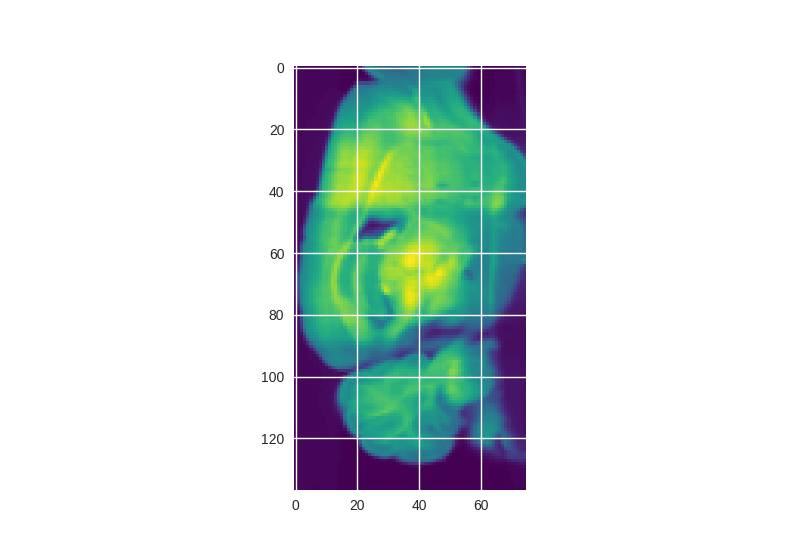

In [18]:
plt.figure()
plt.imshow(tifffile.imread(seed)[50], cmap='viridis')

## Now, run registration on each brain. This can take time...go for a walk grab a coffee (or two)!

In [19]:
register_volumes_to_seed(input_folder, output_folder, parameters, seed, verbose = True)

3 Volume(s) found, registering each to seed ./sample_data/brain1.tif.
Input folder ./sample_data
Output folder ./sample_output
Parameter files ['./parameterfolder/Order1_Par0000affine.txt']

Starting registation on brain2.tif...completed.
Starting registation on brain3.tif...completed.
Starting registation on brain4.tif...completed.
Completed Regstration :] 

### Mean squared error decreases after registration

In [7]:
b1 = tifffile.imread('./sample_data/brain1.tif').astype('uint16')
b2 = tifffile.imread('./sample_data/brain2.tif').astype('uint16')
b2r = tifffile.imread('./sample_output/brain2/result.0.tif').astype('uint16')
print("Mean squared error before registration: {}".format(mse(b1, b2)))
print("Mean squared error after registration: {}".format(mse(b1, b2r)))

Mean squared error before registration: 1025.23605775
Mean squared error after registration: 908.949040065


## Now let's collect the registered data, make a memory mapped array and then generate our final median volume!

In [20]:
generate_median_image(output_folder, parameters, memmappth, final_output_path, verbose = True)

Taking median and saving as ./sample_output/median_image.tif...completed

## Let's take a look at our median image

<IPython.core.display.Javascript object>


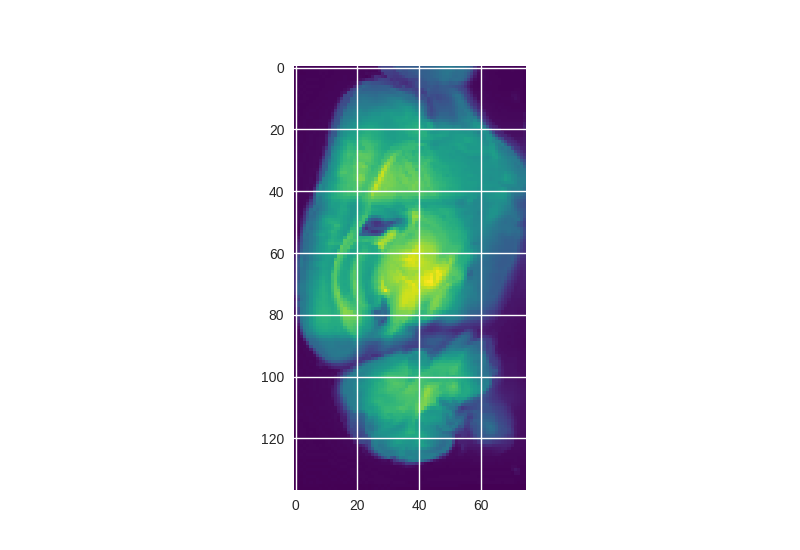

In [21]:
plt.figure()
plt.imshow(tifffile.imread(final_output_path)[50], cmap='viridis')

## Not bad, given very downsized data and only an affine transformation! <br> <br> Remember the higher the number of volumes, likely, the better the atlas will be. Feel free to load the memory mapped array and see if things other than the median volume might be preferred. Let's try the taking the mean instead of the median.

<IPython.core.display.Javascript object>


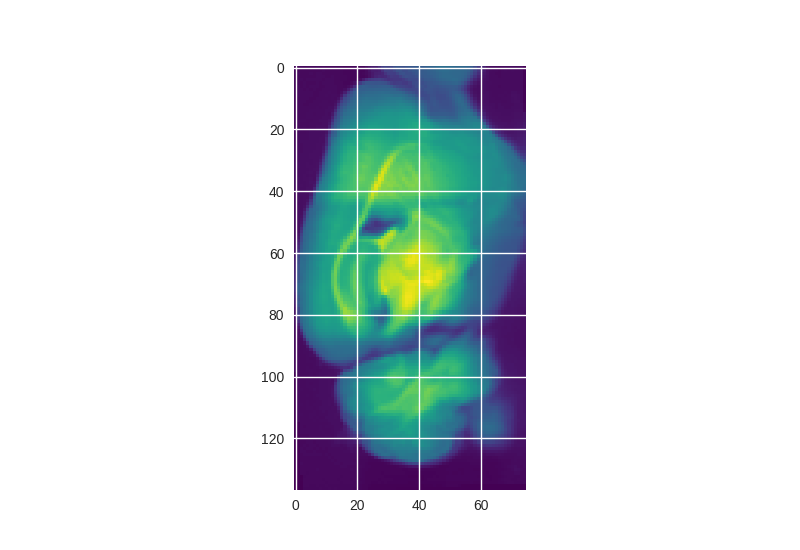

In [23]:
from scripts.functions import load_memmap_arr
import numpy as np
arr = load_memmap_arr(memmappth)
mean_volume = np.mean(arr, axis=0)
plt.figure()
plt.imshow(mean_volume[50], cmap='viridis')

## Happy atlasing!